# Import the necessary libraries and data

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('StudentPerformanceFactors.csv')

# EDA

## Basic EDA

In [10]:
def dataoverview(df, message):
    print(f'{message}:')
    print('\nInfo: ')
    print(df.info())
    print('\nDescribe: ')
    print(df.describe())
    print('\nRows: ', df.shape[0])
    print('\nNumber of features: ', df.shape[1])
    print('\nFeatures: ')
    print(df.columns.tolist())
    print('\nMissing values: ', df.isnull().sum().values.sum())
    print('\nUnique values: ')
    print(df.nunique())
    dups = df.duplicated()
    print("Duplicate Rows",df[dups])
    plt.figure(figsize=(10,12))
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

A Overview about the Student Performance Factors dataset:
5 first rows: 
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Ac

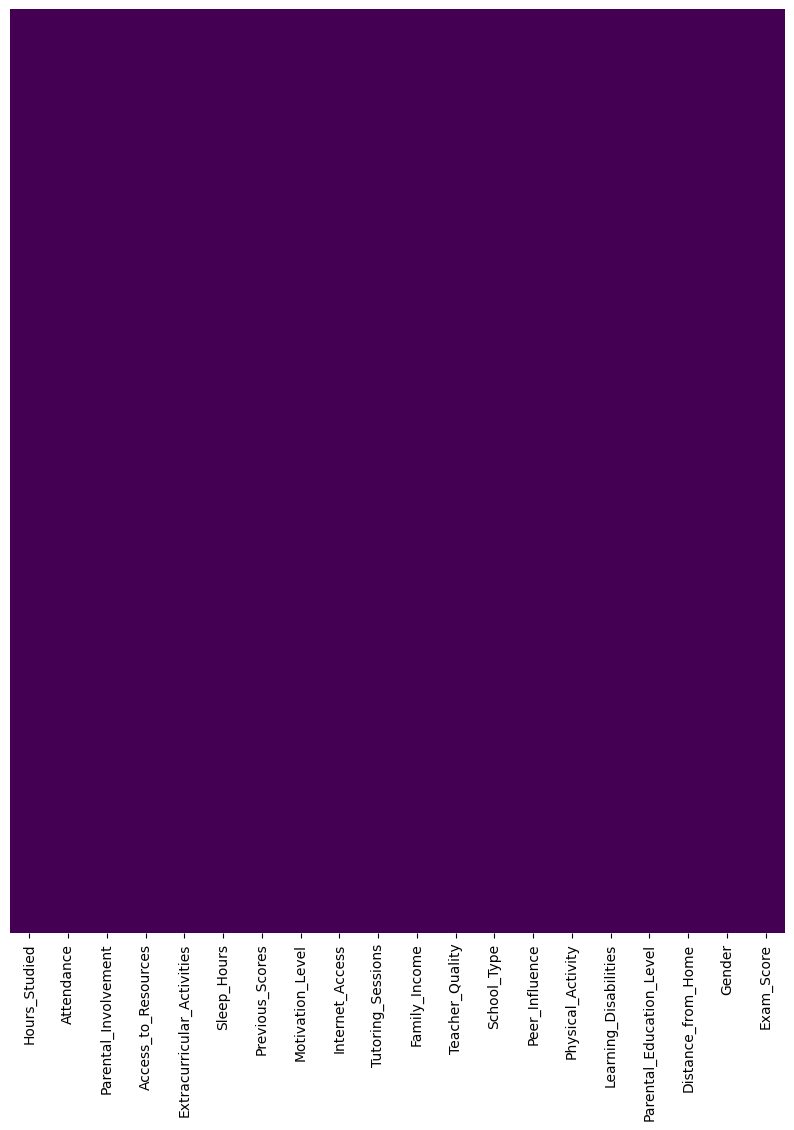

In [42]:
dataoverview(df, 'A Overview about the Student Performance Factors dataset')

## Cleaning data

In [40]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        most_frequent_value = df[column].mode()[0]
        df[column].fillna(most_frequent_value, inplace=True)

## Save data

In [44]:
df.to_csv('cleaning_data.csv', index=False)

## Visualize features

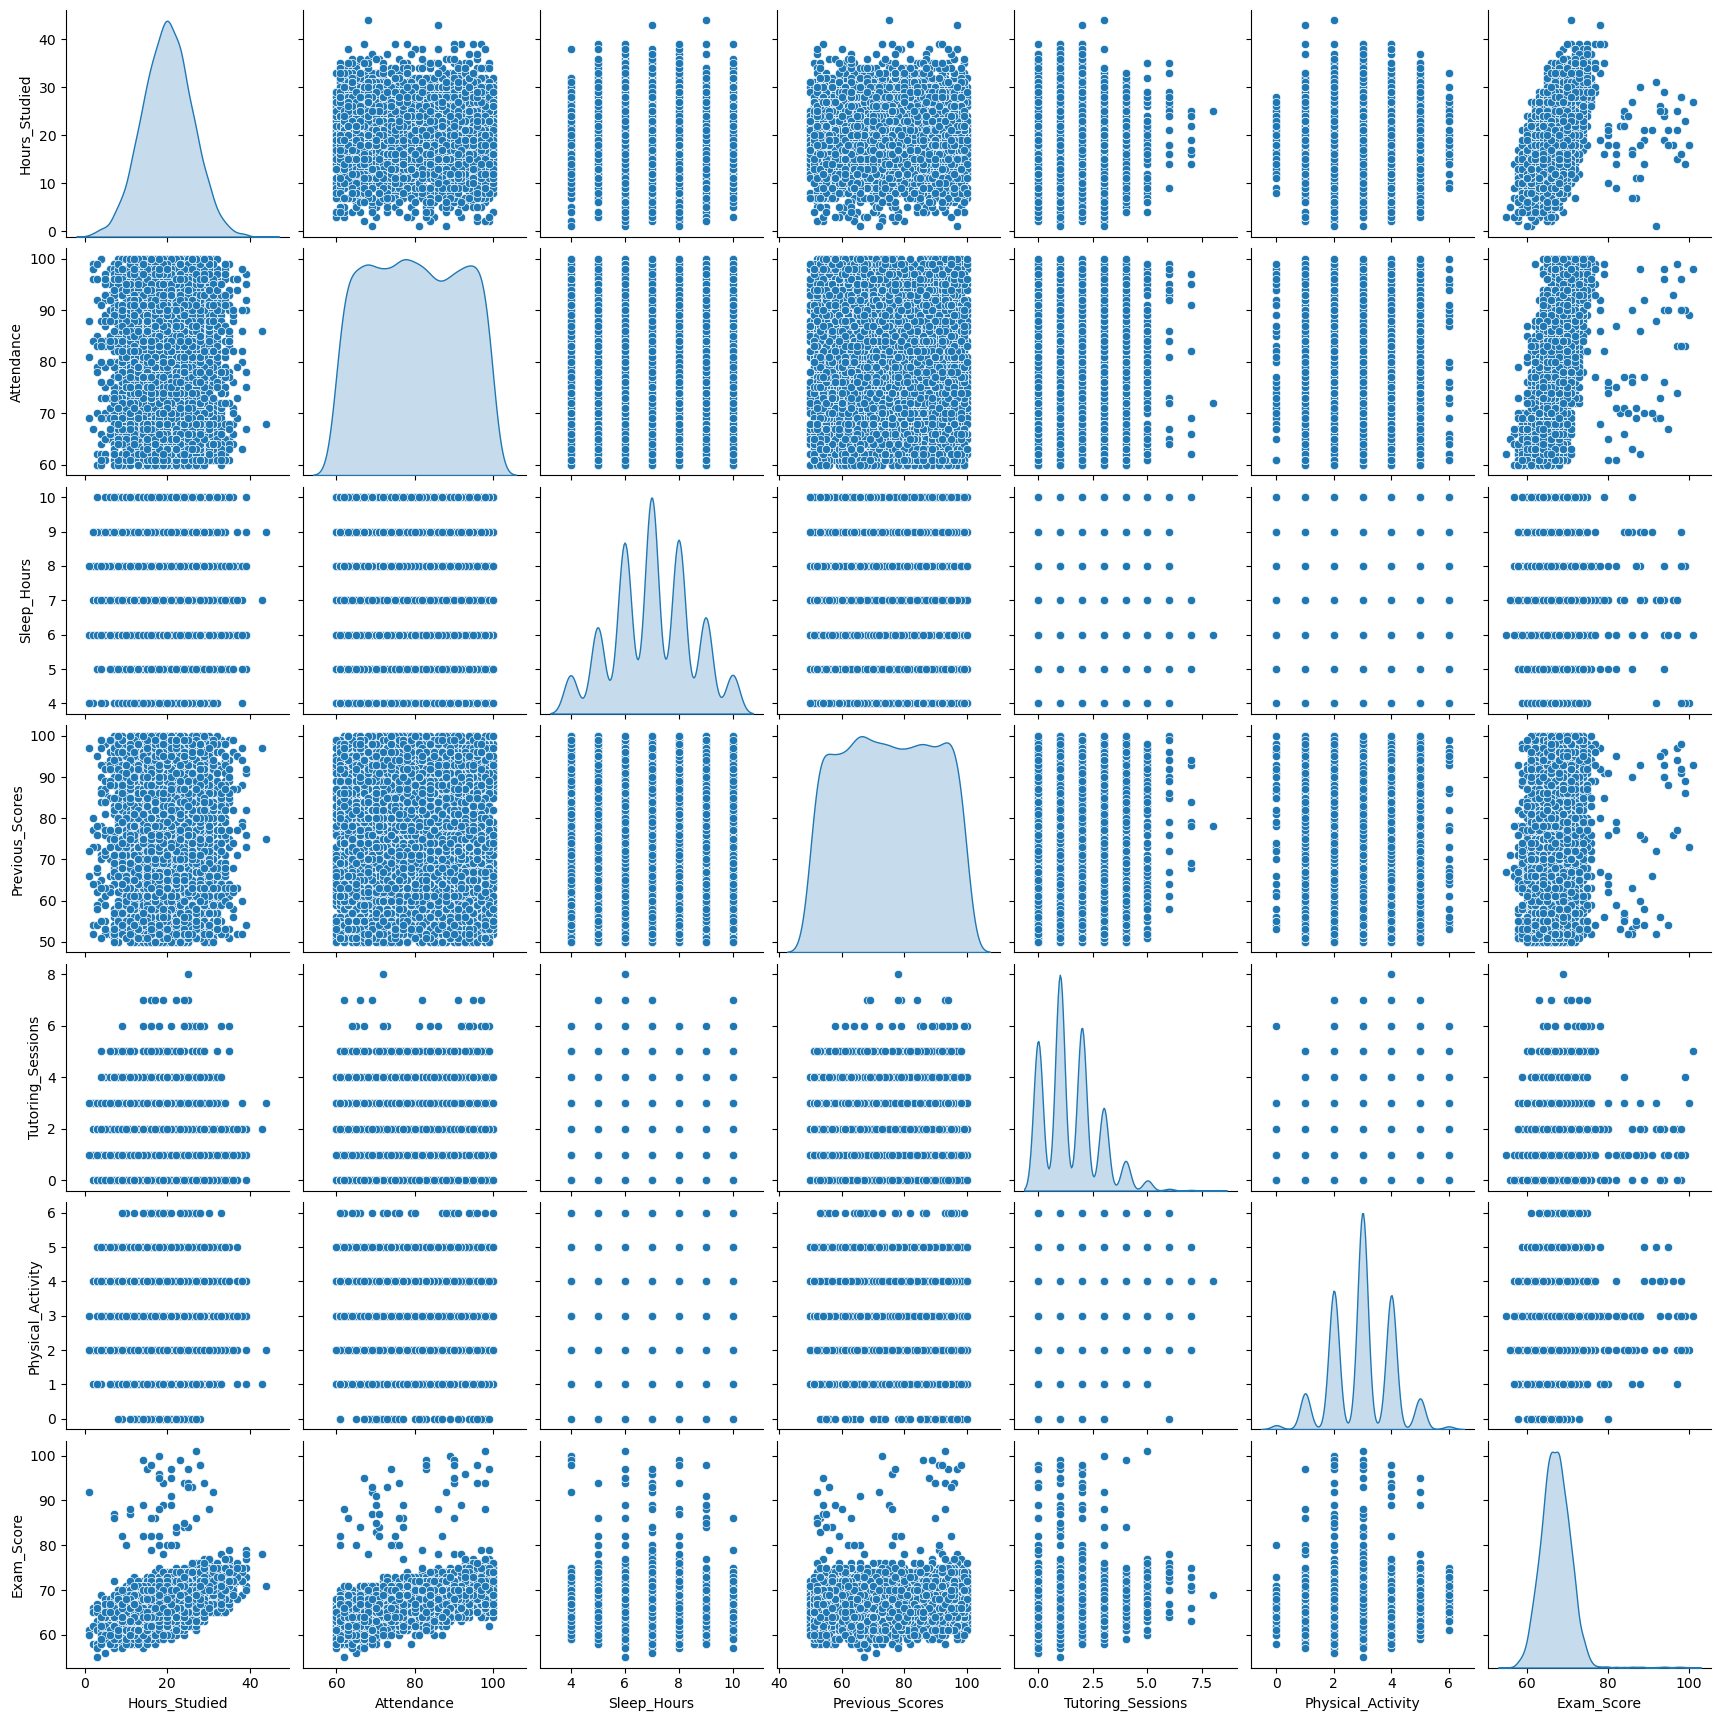

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
def eda_dataset(df):
    #Separating columns to be visualized
    out_cols=list(set(df.nunique()[df.nunique()<6].keys().tolist()
                      + df.select_dtypes(include='object').columns.tolist()))
    viz_cols=[x for x in df.columns if x not in out_cols]
    sns.pairplot(df[viz_cols], diag_kind='kde')
    plt.show()

eda_dataset(df)

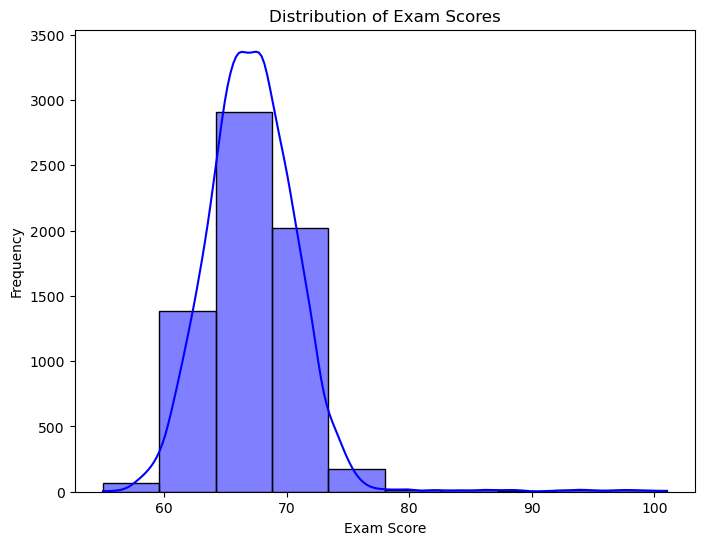

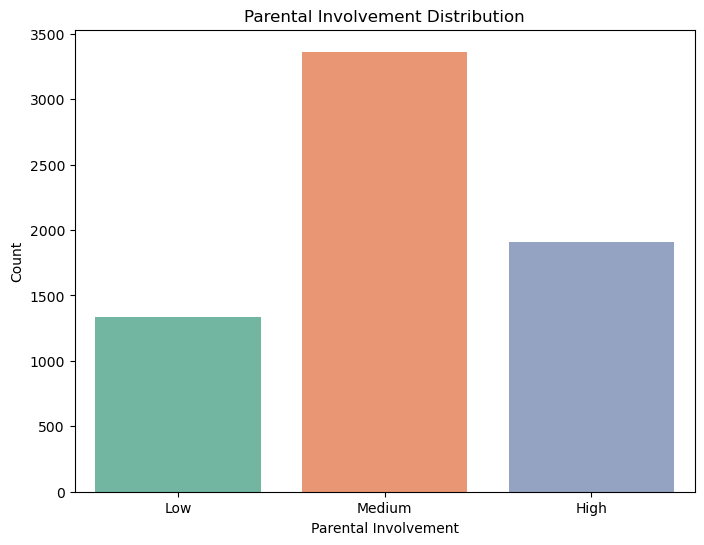

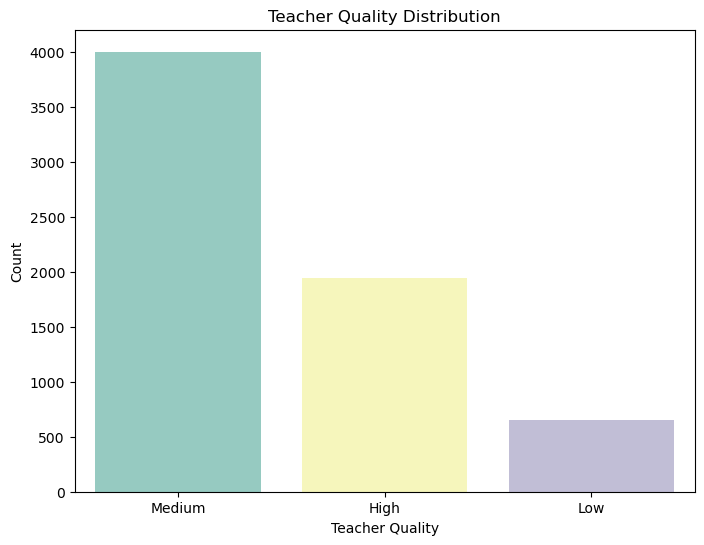

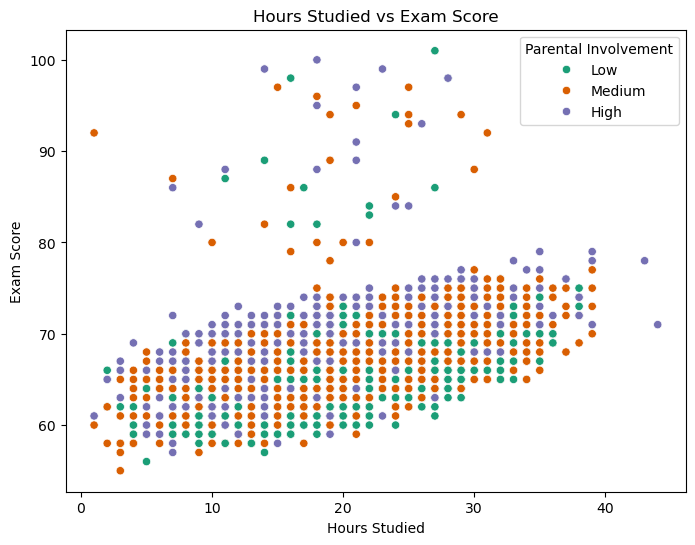

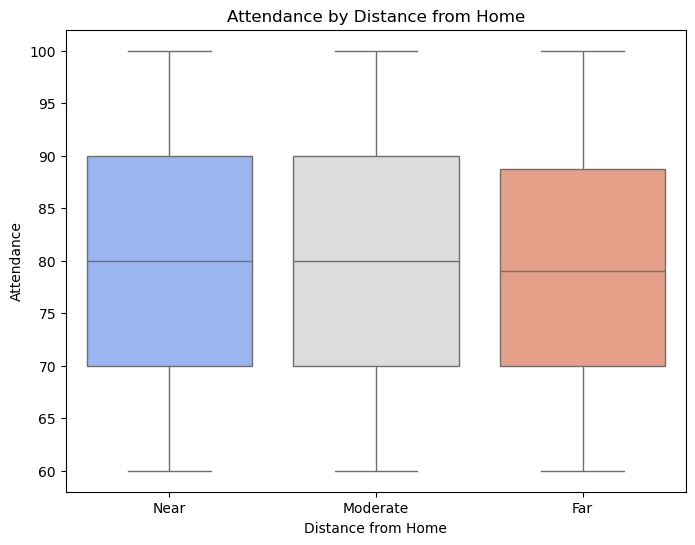

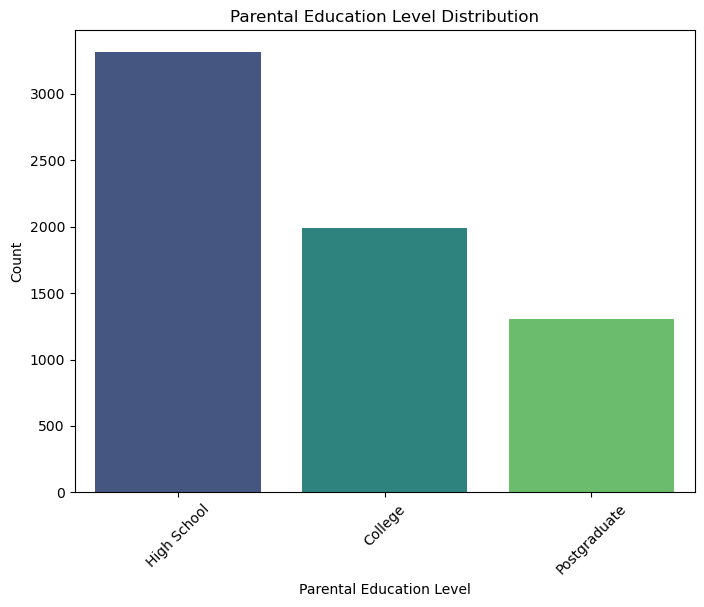

In [57]:
# 1. Biểu đồ phân phối điểm số (Exam_Score)
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# 2. Biểu đồ thanh cho "Parental_Involvement"
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental_Involvement', data=df, palette='Set2')
plt.title('Parental Involvement Distribution')
plt.xlabel('Parental Involvement')
plt.ylabel('Count')
plt.show()

# 3. Biểu đồ thanh cho "Teacher_Quality"
plt.figure(figsize=(8, 6))
sns.countplot(x='Teacher_Quality', data=df, palette='Set3')
plt.title('Teacher Quality Distribution')
plt.xlabel('Teacher Quality')
plt.ylabel('Count')
plt.show()

# 4. Biểu đồ phân tán (Scatter Plot) giữa "Hours_Studied" và "Exam_Score"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, hue='Parental_Involvement', palette='Dark2')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Parental Involvement')
plt.show()

# 5. Biểu đồ hộp (Box Plot) cho "Attendance" theo "Distance_from_Home"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Distance_from_Home', y='Attendance', data=df, palette='coolwarm')
plt.title('Attendance by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Attendance')
plt.show()

# 6. Biểu đồ cột cho "Parental Education Level"
plt.figure(figsize=(8, 6))
sns.countplot(x='Parental_Education_Level', data=df, palette='viridis')
plt.title('Parental Education Level Distribution')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
